## 3. Analyze Emission Lines

Using the fits to the emission lines, this notebookk creates:
1. `Balmer Decrement Map`
2. `NII BPT Diagram`
3. `Halpha NUV Ratio Map`
4. `Halpha CO Velocity Difference Map`
5. `Comparison to ALFOSC`

In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [2]:
#system
from __future__ import division
import sys
import glob

#numpy
import numpy as np

import h5py

import pandas as pd

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_4 as brewermap
%matplotlib inline

#astropy
from astropy.wcs import WCS
import astropy.units as u
from astropy.io import fits

#spectral fitting
import pyspeckit

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [4]:
#uncomment if need to reload module
importlib.reload(sf)

<module 'science_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/science_functions.py'>

In [5]:
#paths
fig_path = path_to_beads + 'Figures/paper/'
gmos_data_directory = path_to_beads + 'Analysis/gmosBeads/'

In [6]:
#About the galaxy cluster
sf.sdss1531_dict

{'name': 'SDSS J1531+3414',
 'ra': 232.7936938,
 'dec': 34.2404172,
 'radius': 2.5,
 'z': 0.335,
 'cz': 100430.47}

In [7]:
#plot style
# pf.styleplots()

### Load Data

In [8]:
# Loading ppxf output for 1-Gaussian fit
save_path = ''.join((path_to_beads,'Analysis/gmosBeads/ppxf/fit_results/result_table/'))
filename = save_path + '2_ppxffit.hdf5'
f = h5py.File(filename, 'r')


In [9]:
#Load Field of View Cube
fov = gmos_data_directory + 'reduced/SDSSJ1531+3414.acube.fits'
hdu, hdr, w = pf.open_fits(fov, naxis=2)

In [10]:
#plot HST on top
hst_hdr, hst_wcs, hst_hdu = sf.load_HST_data(path_to_beads)
ysc_coords = sf.ysc_load(path_to_beads)
hst_cont_color, ysc_color = 'k', 'cyan'

hst_files = glob.glob(''.join((path_to_beads, '/Analysis/hst_data/h*')))

### 1. Balmer Decrement

What could cause Robs to be less than the theoretical value for Ha/Hb. Is this remotely physical?? If so, extinction is not an issue here. The gas is not dusty

In [18]:
#open 2597
path_a2597 = '/Users/osaseomoruyi/Downloads/archive/a2597.fits'
ahdu, ahdr, awcs = pf.open_fits(path_a2597, extension=1)

In [23]:
muse_spectrum = ahdu.data[:,0,0]
for idx in range(1, ahdu.data.shape[1]):
    for idy in range(1, ahdu.data.shape[2]):
        muse_spectrum += ahdu.data[:,idx,idy]

In [26]:
num_spectral_elements = muse_spectrum.shape[0]
muse_wave =  (np.arange(num_spectral_elements) - (ahdr['CRPIX1'] - 1)) * ahdr['CD1_1'] + ahdr['CRVAL1']


In [37]:
2163/715

3.025174825174825

In [40]:
0.00217/0.00157

1.3821656050955415

In [38]:
4861 * (1 + 0.335)

6489.4349999999995

In [34]:
7114/(1 + 0.0821)

6574.253765825709

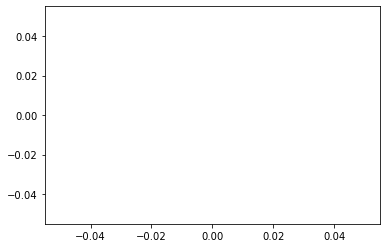

In [31]:
plt.plot(muse_wave, muse_spectrum)

In [29]:
muse_spectrum

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [11]:
Ha, Ha_mask = sf.ppxf_masked_flux_maps(f, 'Ha')
Hb, Hb_mask = sf.ppxf_masked_flux_maps(f, 'Hb')

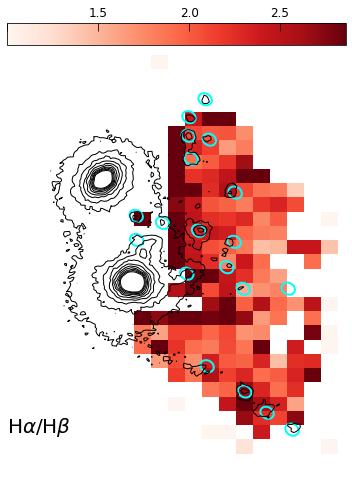

In [22]:
fig = plt.figure(figsize=(5, 7))
gs1 = GridSpec(1, 1)

clims=[[1, 2.86]]
cmap=cm.Reds
maps = [Ha/Hb]
map_names = [r'H$\alpha$/H$\beta$']

for idm, map in enumerate(maps):

    clim = clims[idm]

    ax = fig.add_subplot(gs1[idm], projection=w)
    ax, cb = pf.ax_fits_map(hdu=None, data=map, hdr=hdr,
                            vmin=clim[0], vmax=clim[1], cmap=cmap, 
                            coords=None, ax=ax, contour=False, 
                            clip=None, lw=5, cbar=True, wcs=w)

    ##HST Contours: uncomment below lines if not in rush
    pf.overlay(ax, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color=hst_cont_color, lw=1)

    #YSC Overlay
    pf.overlay(ax, None, 1, None, None, clusters=True, cont_color=ysc_color, 
                ysc_coords=ysc_coords)

    ax.set_xlim(20,0)
    ax.set_ylim(31, 0)

    ax.axis('off')
    ax.text(20, 27, map_names[idm], fontsize=20)

fig.tight_layout()


In [44]:
# ratio_observed = flux_ha / flux_hb
ratio_intrinsic = 2.86
k_alpha = 2.63
k_beta = 3.71

# 0.023/(2.5 / (k_beta - k_alpha)) = (2.5 / (k_beta - k_alpha)) * np.log10(ratio_observed / ratio_intrinsic)


In [47]:
np.exp(0.023/(2.5 / (k_beta - k_alpha))) * ratio_intrinsic

2.8885586041941576

In [70]:
ebv = (2.5 / (k_beta - k_alpha)) * np.log10(2.92 / ratio_intrinsic)


In [71]:
ebv

0.022592215947120926

In [72]:
6.335e-16 /2.93

2.1621160409556313e-16

In [ ]:
#check pyspeckit sdss spectrum



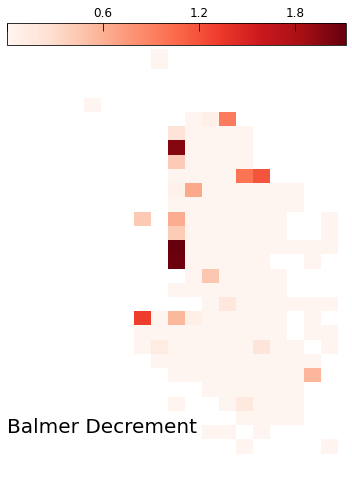

In [26]:
fig = plt.figure(figsize=(5, 7))
gs1 = GridSpec(1, 1)

clims=[[0, None]]
cmap=cm.Reds
maps = [sf.av(Ha, Hb)]
map_names = ['Balmer Decrement']

for idm, map in enumerate(maps):

    clim = clims[idm]

    ax = fig.add_subplot(gs1[idm], projection=w)
    ax, cb = pf.ax_fits_map(hdu=None, data=map, hdr=hdr,
                            vmin=clim[0], vmax=clim[1], cmap=cmap, 
                            coords=None, ax=ax, contour=False, 
                            clip=None, lw=5, cbar=True, wcs=w)

    # ##HST Contours: uncomment below lines if not in rush
    # pf.overlay(ax, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
    #             cont_color=hst_cont_color, lw=1)

    # #YSC Overlay
    # pf.overlay(ax, None, 1, None, None, clusters=True, cont_color=ysc_color, 
    #             ysc_coords=ysc_coords)

    ax.set_xlim(20,0)
    ax.set_ylim(31, 0)

    ax.axis('off')
    ax.text(20, 27, map_names[idm], fontsize=20)

fig.tight_layout()


In [34]:
np.log10(np.nanmedian(Ha/Hb)/2.86) * (2.5/(3.71 - 2.63))

-0.2929832346224556

In [41]:
np.log10(87.6/44.3/2.86) * (2.5/(3.71 - 2.63))

-0.37098530829637005

In [52]:
2.5/(3.71 - 2.63) * np.log10((87.6/44.3)/2.86)

-0.37098530829637005

In [54]:
s_ha, s_hb = flux_abs(87.6, 5.17, 1.3), flux_abs(44.3, 5.17, 1.3)

In [60]:
0.45/0.15

3.0

### 2. [NII] BPT Diagram

The `OIII lines` are incredibly faint and hardly distinguishable from background. Plotting below just to see what it looks like

In [65]:
def Classify_nii_BPT(table):
    """ Classify NII BPT spaxels"""
    snr = 10

    SNR_Ha, Ha_mask = sf.ppx_masked_flux_maps(table, 'Ha', snr=snr)
    SNR_Hb, Hb_mask = sf.ppx_masked_flux_maps(table, 'Hb', snr=snr)
    SNR_OIII, O3_mask = sf.ppx_masked_flux_maps(table, 'OIII5007', snr=snr)
    SNR_NII, N2_mask = sf.ppx_masked_flux_maps(table, 'NII6583', snr=snr)


    ## BPT DIAGRAM: NII ##
    #Kewley et al. 2001: starburst vs AGN classification. Solid lines in BPT
    #log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.47)+1.19
    #Kauffmann et al. 2003: starburst vs composites. Dashed line in BPT
    #log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.05)+1.3
    #Schawinsky et al. 2007: Seyferts vs LINERS
    #log10(flux_oiii_5006/flux_hbeta)=1.05*log10(flux_nii_6583/flux_halpha)+0.45

    i_bptnii = np.log10(SNR_NII/SNR_Ha)
    j_bptnii = np.log10(SNR_OIII/SNR_Hb)
    Kew01_nii = 0.61/(i_bptnii-0.47)+1.19
    Scha07 = 1.05*i_bptnii+0.45
    Ka03 = 0.61/(i_bptnii-0.05)+1.3
    
    agn_nii = ((j_bptnii>=Kew01_nii) & (j_bptnii>Scha07))
    liner_nii = ((j_bptnii>=Kew01_nii) & (j_bptnii<Scha07) | (i_bptnii>=0.47))
    composite_nii = ((j_bptnii>=Ka03) & (j_bptnii<Kew01_nii))
    sf_nii = ((j_bptnii<Ka03) & (i_bptnii<=-0.25))

    excitation = np.zeros_like(SNR_Ha)
    excitation[sf_nii] = 1
    excitation[composite_nii] = 2
    excitation[liner_nii] = 3
    excitation[agn_nii] = 4
    excitation[excitation==0.0] = np.nan

    
    return (i_bptnii, j_bptnii, excitation)

In [66]:
nii_bpt = Classify_nii_BPT(f)

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


The following kwargs were not used by contour: 'rasterized'
findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.


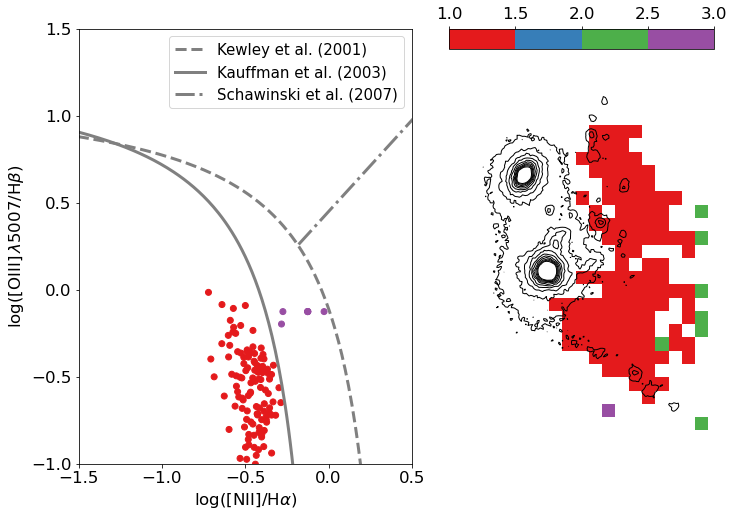

In [70]:
fig = plt.figure(figsize=(12, 8))
            
gs1 = GridSpec(1, 2)
gs1.update(wspace=0.01)

ax =  fig.add_subplot(gs1[0, 0])

cmap = ListedColormap(brewermap.mpl_colors)
excitation = nii_bpt[2]

ax.scatter(nii_bpt[0], nii_bpt[1], c=excitation, cmap=cmap)

t = np.arange(-2.0,0.3,0.01)
l = np.arange(-2.0,0.0,0.01)
s = np.arange(-0.18, 1.5, 0.01)

Kew01_nii = 0.61/(t-0.47)+1.19
Scha07 = 1.05*s+0.45
Ka03 = 0.61/(l-0.05)+1.3

ax.plot(t,Kew01_nii,'--',color='gray',linewidth=3,label='Kewley et al. (2001)')
ax.plot(l,Ka03,'-',color='gray',linewidth=3,label='Kauffman et al. (2003)')
ax.plot(s,Scha07,'-.',color='gray',linewidth=3,label='Schawinski et al. (2007)')


ax.set_xlim(-1.5, 0.5)
ax.set_ylim(-1, 1.5)
ax.legend(fontsize=15)
ax.set_ylabel(r'$\log(\mathrm{[O III]}\,\lambda 5007 / \mathrm{H}\beta)$')
ax.set_xlabel(r'$\log(\mathrm{[N II]}/ \mathrm{H}\alpha)$')


ax2 = fig.add_subplot(gs1[0, 1], projection=WCS(hdr), slices=('x', 'y', 0))
pf.ax_plot(ax2, excitation, hdr, cmap=cmap, vmin=None, vmax = None)
ax2.axis('off')
pf.overlay(ax2, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color='k', lw=1)
ax2.set_xlim(20,0)
ax2.set_ylim(31, 0)

fig.savefig(fig_path + "gmos_bpt_panel.pdf", bbox_inches='tight')

### 3. Halpha NUV Ratio Map

Not super exciting tbh

In [52]:
ysc_coords = sf.ysc_load(path_to_beads)

In [17]:
#save Halpha map as fits file
masked_Ha_flux, Ha_mask = sf.ppx_masked_flux_maps(f, 'Ha')
ha_hdu = fits.PrimaryHDU(data=masked_Ha_flux, header=hdr)
ha_hdu.writeto(''.join((path_to_beads, "Analysis/gmosBeads/products/Halpha_flux_map.fits")), overwrite=True)

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


In [18]:
nuv_hdr, nuv_wcs, nuv_hdu = sf.load_HST_data(path_to_beads, id_file=1)
nuv_file = ''.join((path_to_beads, '/Analysis/hst_data/hst_f390w.fits'))
ha_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/Halpha_flux_map.fits"))

NUV_map.fits


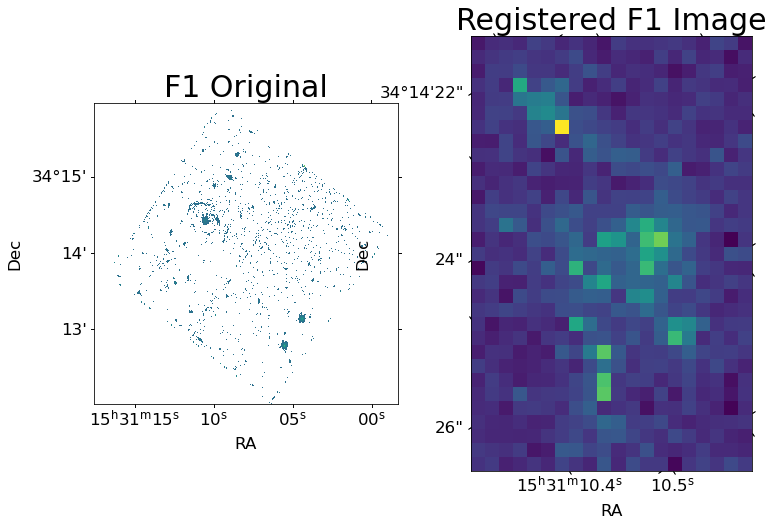

Successfully reprojected /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/gmosBeads/products/Halpha_flux_map.fits to /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength//Analysis/hst_data/hst_f390w.fits
saving new header to products folder


In [27]:
#reproject NUV to Halpha resolution
savepath = ''.join((path_to_beads, "Analysis/gmosBeads/products/reprojected/"))
registered_nuvdata, registered_nuvhdr, registered_nuvfile = pf.reproject(nuv_file, ha_file, save_path=savepath, name = 'NUV_map.fits')

(31.0, 0.0)

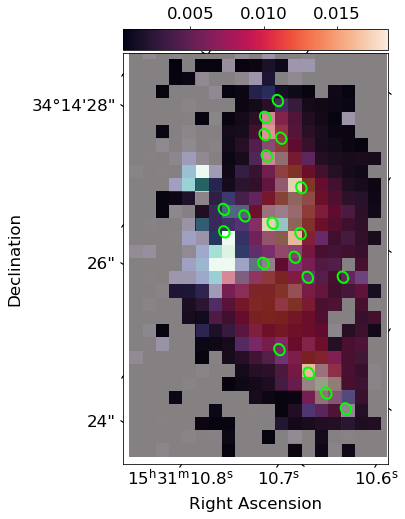

In [57]:
#overplot Halpha and NUV
#they overlap!

#Halpha
cmap=sns.color_palette("rocket", as_cmap=True)
fig, ax = pf.plot_fits_map(masked_Ha_flux, hdr, cmap=cmap, 
                            wcs=None, gmos=1) 
# plt.ylim(107,185)

# NUV Overlay
cmap=sns.color_palette("mako", as_cmap=True)
pf.overlay(ax, hdu=None, data=registered_nuvdata, hdr=registered_nuvhdr, 
            vmin=0.003, vmax=0.02, alpha=0.5, cmap=cmap)

#YSC Overlay
pf.overlay(ax, None, 1, None, None, clusters=True, cont_color='lime', 
            ysc_coords=ysc_coords)
ax.set_xlim(20,0)
ax.set_ylim(31, 0)

In [58]:
#create halpa/nuv ratio map

nuv_ha_ratio = registered_nuvdata/masked_Ha_flux

(31.0, 0.0)

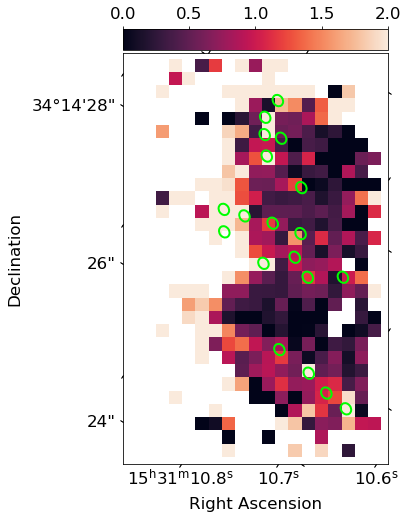

In [64]:
cmap=sns.color_palette("rocket", as_cmap=True)
fig, ax = pf.plot_fits_map(nuv_ha_ratio, hdr, cmap=cmap, 
                            wcs=None, gmos=1, vmin=0, vmax=2) 
#YSC Overlay
pf.overlay(ax, None, 1, None, None, clusters=True, cont_color='lime', 
            ysc_coords=ysc_coords)
            
ax.set_xlim(20,0)
ax.set_ylim(31, 0)

### Halpha CO velocity Difference Map

In [22]:
Ha_flux, Ha_mask = sf.ppxf_masked_flux_maps(f, 'Ha', snr=3)
ha_vel_map, ha_fwhm_map = sf.ppxf_masked_vel_maps(f, Ha_mask)

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


In [23]:
#load alma
alma_path = ''.join((path_to_beads, 'Analysis/almaBeads/'))
vco32_file = ''.join((alma_path, 'reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor.fits'))
moment1_file = ''.join((vco32_file[:-5], '_M1.fits'))
moment2_file = ''.join((vco32_file[:-5] + '_M2.fits'))

moment1_hdu, moment1_hdr, m1wcs = pf.open_fits(moment1_file)
moment2_hdu, moment2_hdr, m2wcs = pf.open_fits(moment2_file)


alma_halpha_flux_map.fits


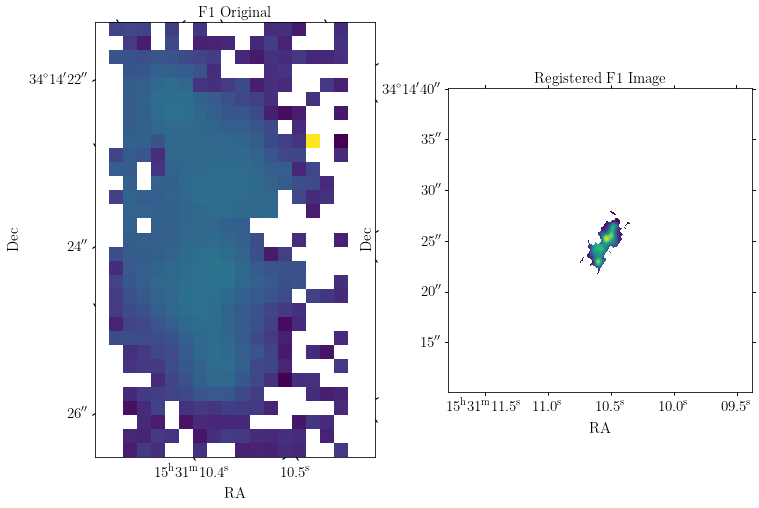

Successfully reprojected /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M1.fits to /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/gmosBeads/products/Halpha_flux_map.fits
saving new header to products folder
alma_halpha_vel_map.fits


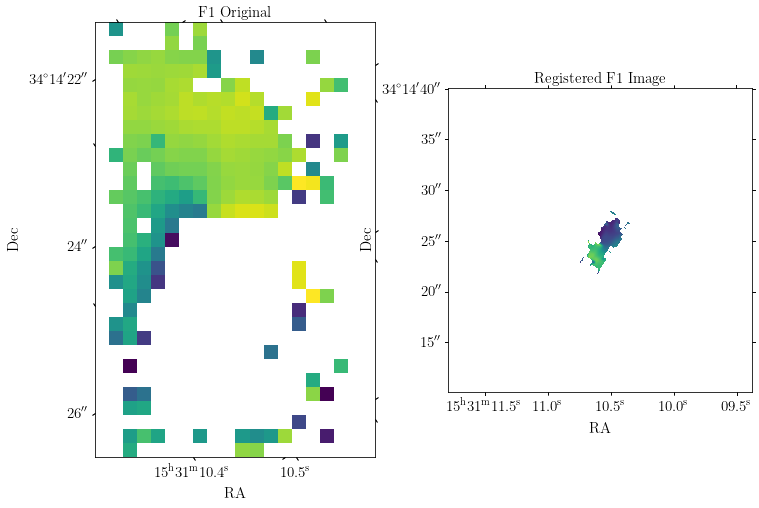

Successfully reprojected /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M1.fits to /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/gmosBeads/products/Halpha_vel_map.fits
saving new header to products folder
alma_halpha_fwhm_map.fits


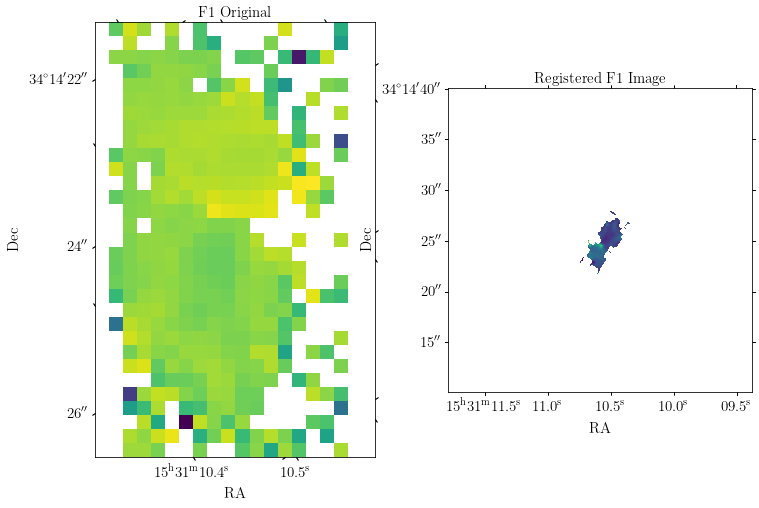

Successfully reprojected /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M1.fits to /Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/gmosBeads/products/Halpha_fwhm_map.fits
saving new header to products folder


In [21]:
#reproject gmos to ALMA
ha_hdu = fits.PrimaryHDU(data=Ha_flux, header=hdr)
ha_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/Halpha_flux_map.fits"))
ha_hdu.writeto(ha_file, overwrite=True)

hav_hdu = fits.PrimaryHDU(data=ha_vel_map, header=hdr)
hav_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/Halpha_vel_map.fits"))
hav_hdu.writeto(hav_file, overwrite=True)

havd_hdu = fits.PrimaryHDU(data=ha_fwhm_map, header=hdr)
havd_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/Halpha_fwhm_map.fits"))
havd_hdu.writeto(havd_file, overwrite=True)

savepath = ''.join((path_to_beads, "Analysis/gmosBeads/products/reprojected/"))
gh_data, gh_hdr, gh_file = pf.reproject(ha_file, moment1_file, save_path=savepath, name = 'alma_halpha_flux_map.fits')
ghv_data, ghv_hdr, ghv_file = pf.reproject(hav_file, moment1_file, save_path=savepath, name = 'alma_halpha_vel_map.fits')
ghvd_data, ghvd_hdr, ghvd_file = pf.reproject(havd_file, moment1_file, save_path=savepath, name = 'alma_halpha_fwhm_map.fits')

In [27]:
ha_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/reprojected/reprojected_alma_halpha_flux_map.fits"))
hav_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/reprojected/reprojected_alma_halpha_vel_map.fits"))
havd_file = ''.join((path_to_beads, "Analysis/gmosBeads/products/reprojected/reprojected_alma_halpha_fwhm_map.fits"))

gh_hdu, gh_hdr, gh_wcs = pf.open_fits(ha_file)
ghv_hdu, ghv_hdr, ghv_wcs = pf.open_fits(hav_file)
ghvd_hdu, ghvd_hdr, ghvd_wcs = pf.open_fits(havd_file)

In [28]:
new_savepath = ''.join((path_to_beads, "Analysis/gmosBeads/products/"))
co_ha_velocity_difference = (ghv_hdu.data+300) - moment1_hdu.data/1e3 
fits.writeto(''.join((new_savepath, 'co_ha_velocity_difference.fits')), 
                        co_ha_velocity_difference, moment1_hdr, overwrite=True)
    

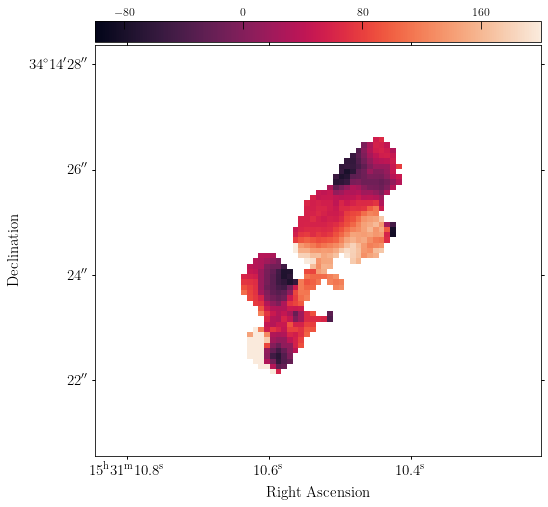

In [29]:
#draw
fig = plt.figure(figsize=(8,8))
gs1 = GridSpec(1, 1)
gs1.update(wspace=0.01)

hst_zoom = [sf.sdss1531_dict['ra'] + 2e-4, sf.sdss1531_dict['dec']-3e-4, 4 * u.arcsec]

cmap=sns.color_palette("rocket", as_cmap=True)
#ax1
ax1 = fig.add_subplot(gs1[0], projection=m1wcs)

ax1, cb1 = pf.ax_fits_map(hdu=None, data=co_ha_velocity_difference,
                         hdr=moment1_hdr, vmin=-100, vmax=200, 
                         cmap=cmap, coords=hst_zoom, ax=ax1, contour=False)

In [36]:
co_ha_dispersion_ratio = (ghvd_hdu.data)/(moment2_hdu.data/1e3)
fits.writeto(''.join((new_savepath, 'co_ha_dispersion_ratio.fits')), 
                        co_ha_dispersion_ratio , moment1_hdr, overwrite=True)

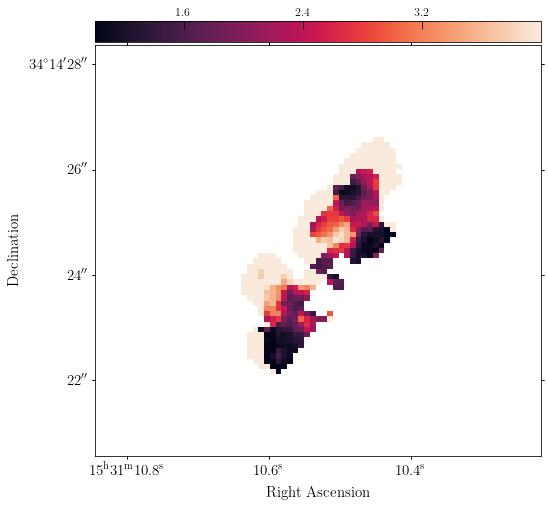

In [48]:
#draw
fig = plt.figure(figsize=(8,8))
gs1 = GridSpec(1, 1)
gs1.update(wspace=0.01)

hst_zoom = [sf.sdss1531_dict['ra'] + 2e-4, sf.sdss1531_dict['dec']-3e-4, 4 * u.arcsec]

cmap=sns.color_palette("rocket", as_cmap=True)
#ax1
ax1 = fig.add_subplot(gs1[0], projection=m1wcs)

ax1, cb1 = pf.ax_fits_map(hdu=None, data=co_ha_dispersion_ratio,
                         hdr=moment1_hdr, vmin=1, vmax=4, 
                         cmap=cmap, coords=hst_zoom, ax=ax1, contour=False)

In [49]:
np.nanmedian(co_ha_dispersion_ratio)

3.0367316145241707

### 5. Comparison to ALFOSC and SDSS spectra

How different is the total Halpha luminosity measured by SDSS vs ALFOSC vs GMOS?

Need to figure out how to construct alfosc wavelength axis

In [12]:
#paths to spectra

#sdss 
spec_path = path_to_beads + 'Analysis/optical_spectra/Nordic_Optical_Telescope_Spectrum/spec/'
sdss_spectrum_file = spec_path + 'sdss_smoothed.fits'

#alfosc

# alfosc_file = spec_path + 'lowerfinal_smoothed10.fits'

#gmos integrated spectrum
gmos_spec_file = path_to_beads + 'Analysis/gmosBeads_REDO/Data/integrated_gmos_spectrum.fits'

In [19]:
#integrated spectrum

gmos_spectrum = hdu.data[:,0,0]
for idx in range(1, hdu.data.shape[1]):
    for idy in range(1, hdu.data.shape[2]):
        gmos_spectrum += hdu.data[:,idx,idy]

In [13]:
gmos_spectrum

array([0.16713268, 0.16357295, 0.14508793, ..., 0.09999351, 0.08524799,
       0.07038858], dtype=float32)

In [97]:
gmos_spectrum = fits.open(gmos_spec_file)[0].data

In [98]:
len(gmos_spectrum)

4573

In [13]:
#read in and open spectra 

#gmos
gmos_spectrum = fits.open(gmos_spec_file)[0].data
ghdr = fits.open(gmos_spec_file)[0].header
num_spectral_elements = gmos_spectrum.shape[0]
gmos_wave =  (np.arange(num_spectral_elements) - (ghdr['CRPIX1'] - 1)) * ghdr['CDELT1'] + ghdr['CRVAL1']


#sdss
sdss_spectrum = fits.open(sdss_spectrum_file)[0]
sdss_hdr = sdss_spectrum.header

sdss_wave = []
#https://classic.sdss.org/dr3/products/spectra/read_spSpec.html

for pixel in range(sdss_hdr['NAXIS1']):
    sdss_wave_i = 10**(sdss_hdr['COEFF0'] + (sdss_hdr['COEFF1'] * (pixel))) #in vacuum units https://classic.sdss.org/dr3/products/spectra/vacwavelength.html
    sdss_wave_air_i = sdss_wave_i / (1.0 + 2.735182E-4 + 131.4182 / sdss_wave_i**2 + 2.76249E8 / sdss_wave_i**4)
    sdss_wave.append(sdss_wave_air_i)

#convert the data to the same units


In [21]:
((gmos_wave[-1] - gmos_wave[0])/gmos_wave[-1])

0.35558419625788457

In [189]:
len(np.array(sdss_wave)[np.array(sdss_wave)>5800])

2013

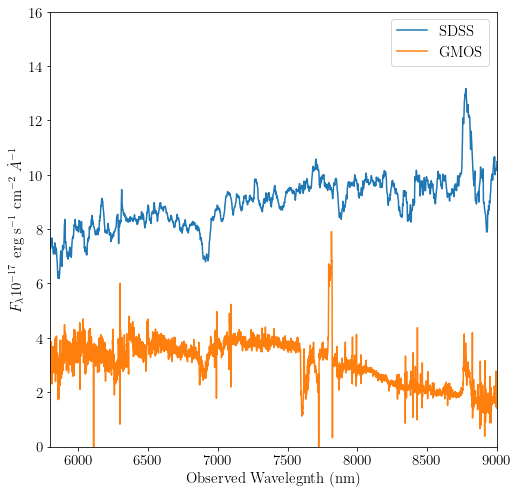

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(sdss_wave , sdss_spectrum.data[0], label ='SDSS')
ax.plot(gmos_wave, gmos_spectrum*10, label ='GMOS')

ax.set_ylim(0,16)
ax.set_xlim(5800, 9000)
ax.set_ylabel(r'$F_\lambda 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\dot{A}^{-1}$')
ax.set_xlabel(r'Observed Wavelegnth (nm)')

# ax.axvline(6562.80 * (1+0.335), ls = '--', color='r', label = 'Ha Line at z=0.335')
# # ax.axvline(4861.35 * (1+0.335), ls = '--', color='r', label = 'Hb Line at z=0.335')

# ax.axvline(8730, ls = '--', color='g')
# ax.axvline(8850, ls = '--', color='g')

# # ax.axvline(8755, ls = '--', color='b')
# # ax.axvline(8772, ls = '--', color='b')

# ax.axvline(6477, ls = '--', color='g')
# ax.axvline(6520, ls = '--', color='g')

# ax.axvline(6490, ls = '--', color='b')
# ax.axvline(6496, ls = '--', color='b')
ax.legend()

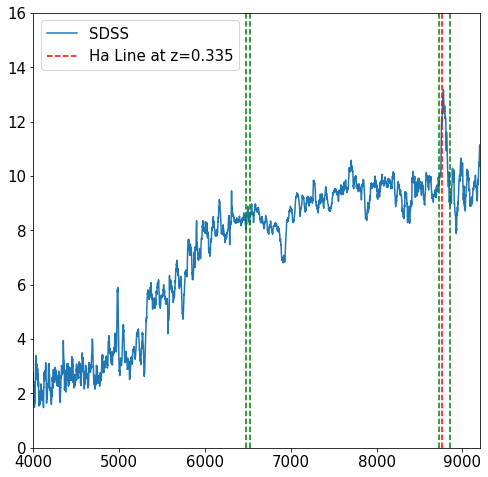

In [182]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(sdss_wave , sdss_spectrum.data[0], label ='SDSS')

ax.set_ylim(0,16)
ax.set_xlim(4000, 9200)
# ax.set_ylabel(r'$F_\lambda 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\dot{A}^{-1}$')
# ax.set_xlabel(r'Observed Wavelegnth (nm)')

ax.axvline(6562.80 * (1+0.335), ls = '--', color='r', label = 'Ha Line at z=0.335')
# ax.axvline(4861.35 * (1+0.335), ls = '--', color='r', label = 'Hb Line at z=0.335')

ax.axvline(8730, ls = '--', color='g')
ax.axvline(8850, ls = '--', color='g')

# ax.axvline(8755, ls = '--', color='b')
# ax.axvline(8772, ls = '--', color='b')

ax.axvline(6477, ls = '--', color='g')
ax.axvline(6520, ls = '--', color='g')

# ax.axvline(6490, ls = '--', color='b')
# ax.axvline(6496, ls = '--', color='b')
ax.legend()

In [184]:
70/25

2.8

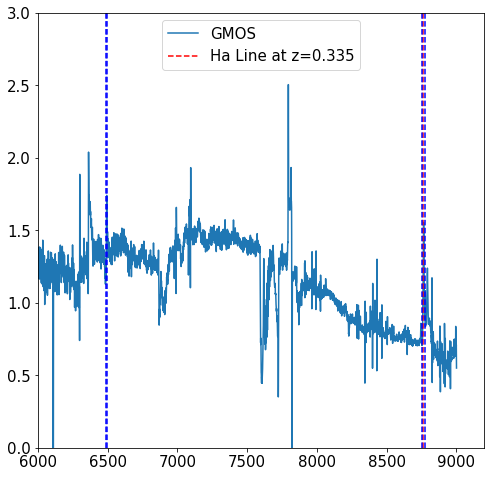

In [195]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(gmos_wave, gmos_spectrum*10, label ='GMOS')
ax.set_ylim(0,3)
ax.set_xlim(6000, 9200)
# ax.set_ylabel(r'$F_\lambda 10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\dot{A}^{-1}$')
# ax.set_xlabel(r'Observed Wavelegnth (nm)')

ax.axvline(6562.80 * (1+0.335), ls = '--', color='r', label = 'Ha Line at z=0.335')
# ax.axvline(4861.35 * (1+0.335), ls = '--', color='r', label = 'Hb Line at z=0.335')

# ax.axvline(8730, ls = '--', color='g')
# ax.axvline(8850, ls = '--', color='g')

ax.axvline(8755, ls = '--', color='b')
ax.axvline(8772, ls = '--', color='b')

# ax.axvline(6477, ls = '--', color='g')
# ax.axvline(6520, ls = '--', color='g')

ax.axvline(6490, ls = '--', color='b')
ax.axvline(6496, ls = '--', color='b')
ax.legend()

In [74]:
def sum_flux_array(wave, flux_spectrum, wave_min, wave_max):
    """ alternative to fitting data the right way bc i cant figure
    out pyspeckit """
    wave_id = np.where((np.array(wave) > wave_min) & (np.array(wave) < wave_max))[0]
    wave_flux = np.sum(flux_spectrum[wave_id])
    return wave_flux


In [173]:
sdss_hb_flux = sum_flux_array(sdss_wave, sdss_spectrum.data[0], 6477, 6520)
gmos_hb_flux = sum_flux_array(gmos_wave, gmos_spectrum * 10, 6490, 6496)

sdss_ha_flux = sum_flux_array(sdss_wave, sdss_spectrum.data[0], 8730, 8850)
gmos_ha_flux = sum_flux_array(gmos_wave, gmos_spectrum * 10, 8755, 8785)


In [168]:
6520 - 6477, 6496 - 6490

(43, 6)

In [171]:
120/7

17.142857142857142

In [165]:
gmos_hb_flux, sdss_hb_flux

(18.48559, 245.55473)

In [166]:
gmos_ha_flux, sdss_ha_flux

(62.735085, 664.5703)

In [167]:
gmos_ha_flux/gmos_hb_flux, sdss_ha_flux/sdss_hb_flux

(3.3937292, 2.706404)

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


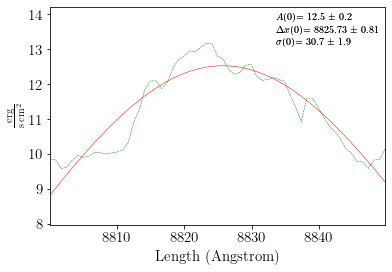

In [129]:
#estimate total luminosity with pyspeckit

spectrum_range =[8800, 8850]
spectrum_xaxis = np.linspace(5800, 9000, len(sdss_wave))#np.array(sdss_wave)#* u.AA
ids = np.where((spectrum_xaxis > spectrum_range[0]) & (spectrum_xaxis < spectrum_range[1]))
data_xaxis = spectrum_xaxis[ids]
spectrum = sdss_spectrum.data[0]
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
guesses= [13, 8825, 35]
xminval, xmaxval = [None, None]

sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='g')
# sp.baseline(subtract=False)
sp.specfit()

integral, error = sp.specfit.integral(return_error=True)
    

In [130]:
integral * 1e-17

5.690899816810181e-15

support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


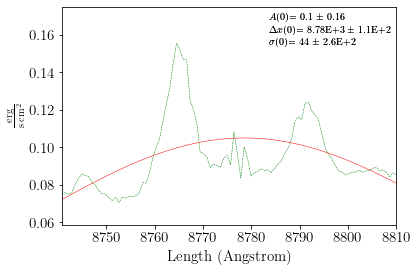

In [133]:
#estimate total luminosity with pyspeckit

spectrum_range =[8740, 8810]
spectrum_xaxis = gmos_wave#np.array(sdss_wave)#* u.AA
ids = np.where((spectrum_xaxis > spectrum_range[0]) & (spectrum_xaxis < spectrum_range[1]))
data_xaxis = spectrum_xaxis[ids]
spectrum = gmos_spectrum
data = spectrum[ids]
spectrum_err = np.full(len(data), 1.0) #* (u.erg/u.s/u.cm**2)
units = [u.AA, u.erg/u.s/u.cm**2]
xlabel ='Wavelength'
ylabel='Flux'
guesses= [13, 8765, 35]
xminval, xmaxval = [None, None]

sp = pyspeckit.Spectrum(xarr=data_xaxis, data=data, xarrkwargs={'unit':units[0]}, unit=units[1])

sp.plotter(linestyle='dashed', color='g')
# sp.baseline(subtract=False)
sp.specfit()

integral, error = sp.specfit.integral(return_error=True)
    

In [134]:
integral *1e-16

6.615143859945296e-16

In [7]:
#extinction corrected
lha_alfosc_25_slit = 6.21e41 * u.erg/u.s